## <div style="text-align: center">A Journey with Scikit-Learn </div>

<div style="text-align: center">There are plenty of <b>courses and tutorials</b> that can help you learn Scikit-Learn from scratch but here in <b>Kaggle</b>, I want to predict <b>House prices</b>(in the next version)  a popular machine learning Dataset as a comprehensive workflow with Scikit-Learn. 
After reading, you can use this workflow to solve other real problems and use it as a template to deal with <b>machine learning</b> problems.</div>
<div style="text-align:center">last update: <b>10/15/2018</b></div>



>###### you may  be interested have a look at it: [**A Comprehensive ML Workflow for House Prices**](https://www.kaggle.com/mjbahmani/a-comprehensive-ml-workflow-for-house-prices)


---------------------------------------------------------------------
you can follow me on:
> ###### [ GitHub](https://github.com/mjbahmani)
> ###### [Kaggle](https://www.kaggle.com/mjbahmani/)
-------------------------------------------------------------------------------------------------------------
 **I hope you find this kernel helpful and some upvotes would be very much appreciated**
 
 -----------

## 1-Introduction

- The __open source__ Python ecosystem provides __a standalone, versatile and powerful scientific working environment__, including: [NumPy](http://numpy.org), [SciPy](http://scipy.org), [IPython](http://ipython.org), [Matplotlib](http://matplotlib.org), [Pandas](http://pandas.pydata.org/), _and many others..._



- Scikit-Learn builds upon NumPy and SciPy and __complements__ this scientific environment with machine learning algorithms;
- By design, Scikit-Learn is __non-intrusive__, easy to use and easy to combine with other libraries;
- Core algorithms are implemented in low-level languages.

## 2- Algorithms

__Supervised learning:__

* Linear models (Ridge, Lasso, Elastic Net, ...)
* Support Vector Machines
* Tree-based methods (Random Forests, Bagging, GBRT, ...)
* Nearest neighbors 
* Neural networks (basics)
* Gaussian Processes
* Feature selection

__Unsupervised learning:__

* Clustering (KMeans, Ward, ...)
* Matrix decomposition (PCA, ICA, ...)
* Density estimation
* Outlier detection

__Model selection and evaluation:__

* Cross-validation
* Grid-search
* Lots of metrics

_... and many more!_ (See our [Reference](http://scikit-learn.org/dev/modules/classes.html))

## 3- Framework

Data comes as a finite learning set ${\cal L} = (X, y)$ where
* Input samples are given as an array $X$ of shape `n_samples` $\times$ `n_features`, taking their values in ${\cal X}$;
* Output values are given as an array $y$, taking _symbolic_ values in ${\cal Y}$.

The goal of supervised classification is to build an estimator $\varphi: {\cal X} \mapsto {\cal Y}$ minimizing

$$
Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}
$$

where $\ell$ is a loss function, e.g., the zero-one loss for classification $\ell_{01}(Y,\hat{Y}) = 1(Y \neq \hat{Y})$.

## 4- Applications

- Classifying signal from background events; 
- Diagnosing disease from symptoms;
- Recognising cats in pictures;
- Identifying body parts with Kinect cameras;
- ...
  

## 5- Data 

- Input data = Numpy arrays or Scipy sparse matrices ;
- Algorithms are expressed using high-level operations defined on matrices or vectors (similar to MATLAB) ;
    - Leverage efficient low-leverage implementations ;
    - Keep code short and readable. 

In [33]:
# Generate data
from sklearn.datasets import make_blobs
import numpy as np
X, y = make_blobs(n_samples=1000, centers=20, random_state=123)
labels = ["b", "r"]
y = np.take(labels, (y < 10))
print(X) 
print(y[:5])

[[-6.45255647 -8.76358259]
 [ 0.28982141  0.14677196]
 [-5.18412293 -1.25347025]
 ..., 
 [-0.23142814 -1.60800704]
 [-0.60291835  6.87297279]
 [ 2.28425964  4.87408773]]
['r' 'r' 'b' 'r' 'b']


In [34]:
# X is a 2 dimensional array, with 1000 rows and 2 columns
print(X.shape)
 
# y is a vector of 1000 elements
print(y.shape)

(1000, 2)
(1000,)


In [35]:
# Rows and columns can be accessed with lists, slices or masks
print(X[[1, 2, 3]])     # rows 1, 2 and 3
print(X[:5])            # 5 first rows
print(X[500:510, 0])    # values from row 500 to row 510 at column 0
print(X[y == "b"][:5])  # 5 first rows for which y is "b"

[[ 0.28982141  0.14677196]
 [-5.18412293 -1.25347025]
 [-4.71388847  3.67440463]]
[[-6.45255647 -8.76358259]
 [ 0.28982141  0.14677196]
 [-5.18412293 -1.25347025]
 [-4.71388847  3.67440463]
 [ 4.51558296 -2.88138033]]
[-4.43836309 -2.45974437  4.33104832 -7.92069399  1.56972029  0.56451501
  4.99608298  4.75811106 -1.60421418  1.10129122]
[[-5.18412293 -1.25347025]
 [ 4.51558296 -2.88138033]
 [ 1.70826922  2.62387342]
 [-0.52606562  8.95985097]
 [-1.07591403  9.78730967]]


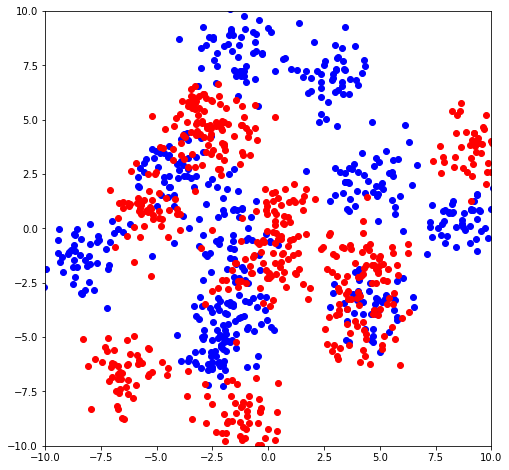

In [10]:
# Plot
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.max_open_warning"] = -1
plt.figure()
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

## 6- Loading external data

- Numpy provides some [simple tools](https://docs.scipy.org/doc/numpy/reference/routines.io.html) for loading data from files (CSV, binary, etc);

- For structured data, Pandas provides more [advanced tools](http://pandas.pydata.org/pandas-docs/stable/io.html) (CSV, JSON, Excel, HDF5, SQL, etc);

## 7- A simple and unified API

All learning algorithms in scikit-learn share a uniform and limited API consisting of complementary interfaces:

- an `estimator` interface for building and fitting models;
- a `predictor` interface for making predictions;
- a `transformer` interface for converting data.

Goal: enforce a simple and consistent API to __make it trivial to swap or plug algorithms__. 

### 8- Estimators

In [13]:
class Estimator(object):
    def fit(self, X, y=None):
        """Fits estimator to data."""
        # set state of ``self``
        return self

In [14]:
# Import the nearest neighbor class
from sklearn.neighbors import KNeighborsClassifier  # Change this to try 
                                                    # something else

# Set hyper-parameters, for controlling algorithm
clf = KNeighborsClassifier(n_neighbors=5)

# Learn a model from training data
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
# Estimator state is stored in instance attributes
clf._tree

### 9- Predictors

In [17]:
# Make predictions  
print(clf.predict(X[:5])) 

['r' 'r' 'r' 'b' 'b']


In [18]:
# Compute (approximate) class probabilities
print(clf.predict_proba(X[:5]))

[[ 0.   1. ]
 [ 0.   1. ]
 [ 0.2  0.8]
 [ 0.6  0.4]
 [ 0.8  0.2]]


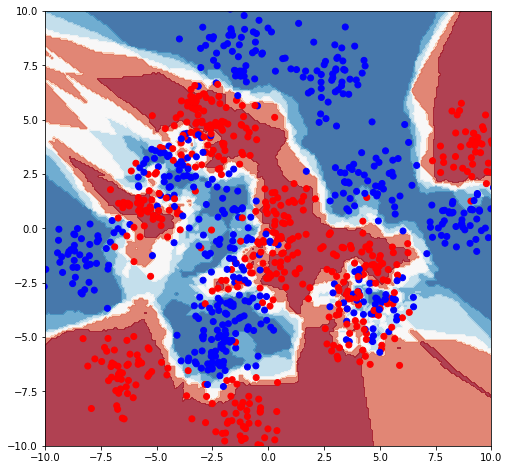

In [19]:
from tutorial import plot_surface    
plot_surface(clf, X, y)

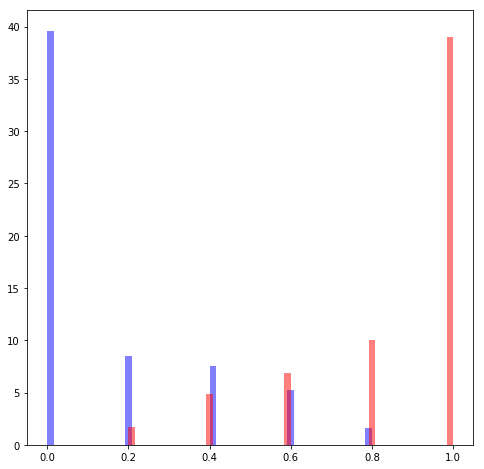

In [20]:
from tutorial import plot_histogram    
plot_histogram(clf, X, y)

### 10- Decision trees

Idea: greedily build a partition of the input space using cuts orthogonal to feature axes.

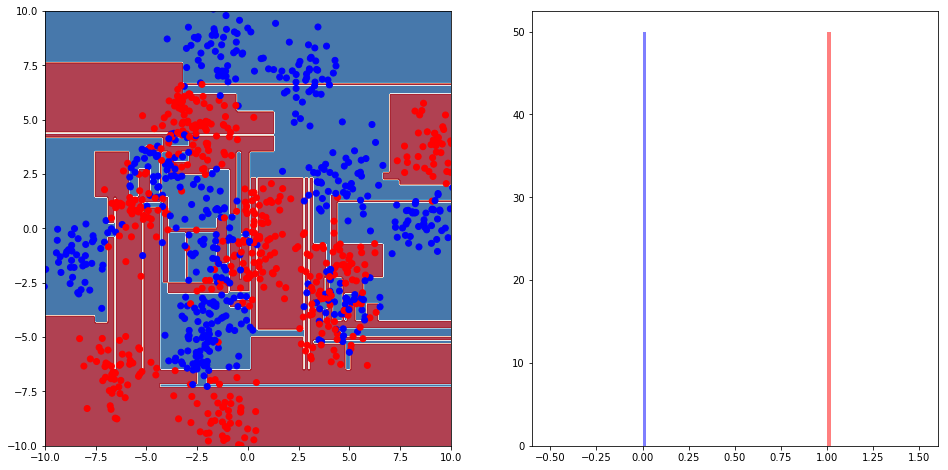

In [22]:
from tutorial import plot_clf
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_clf(clf, X, y)

### 11- Random Forests

Idea: Build several decision trees with controlled randomness and average their decisions.

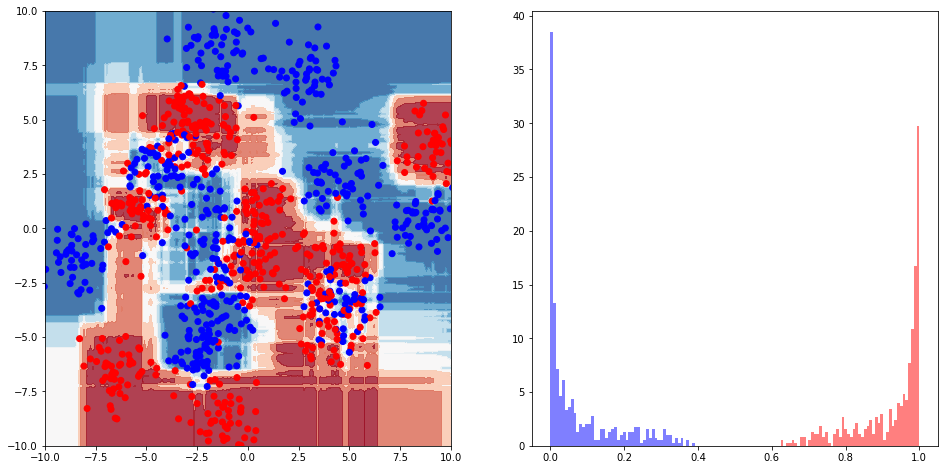

In [23]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=500)
# from sklearn.ensemble import ExtraTreesClassifier 
# clf = ExtraTreesClassifier(n_estimators=500)
clf.fit(X, y)
plot_clf(clf, X, y)

### 12- Logistic regression

Idea: model the decision boundary as an hyperplane.

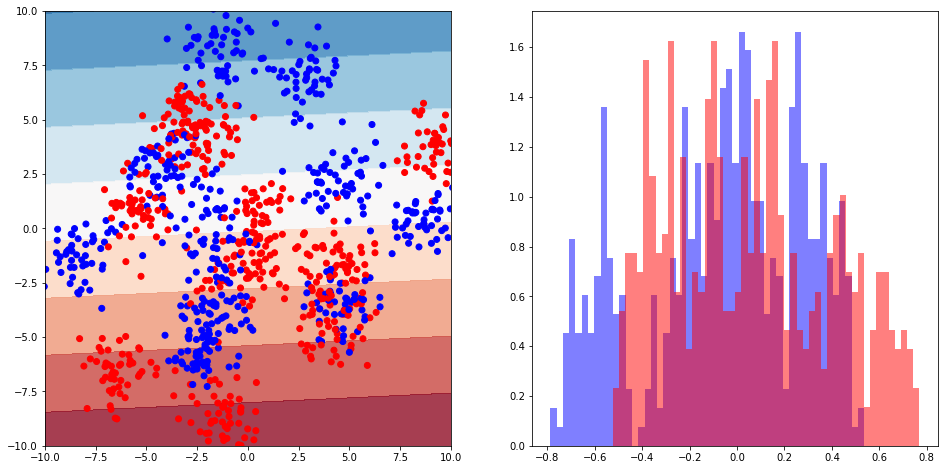

In [24]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
plot_clf(clf, X, y)

### 13-Support vector machines

Idea: Find the hyperplane which has the largest distance to the nearest training points of any class.

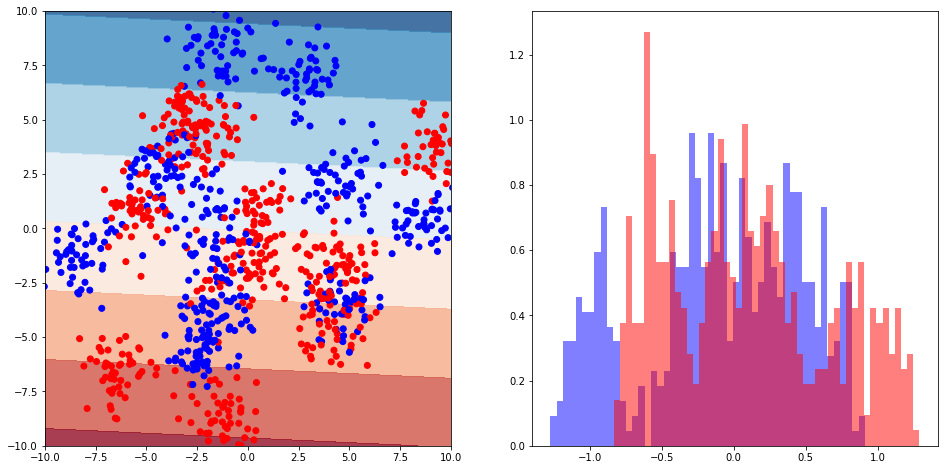

In [25]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")  # try kernel="rbf" instead
clf.fit(X, y)
plot_clf(clf, X, y)

### 14- Multi-layer perceptron

Idea: a multi-layer perceptron is a circuit of non-linear combinations of the data.

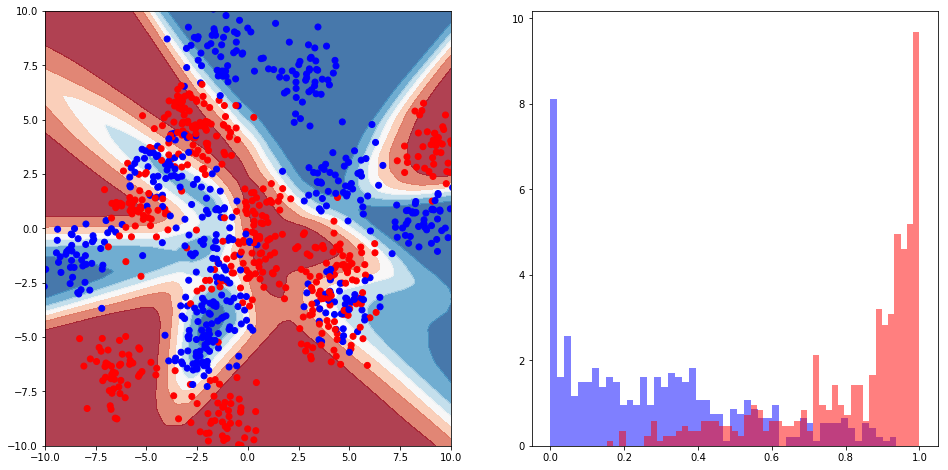

In [26]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation="relu", learning_rate="invscaling")
clf.fit(X, y)
plot_clf(clf, X, y)

In [ ]:
# Model evaluation and selection

## 15- Evaluation

- Recall that we want to learn an estimator $\varphi$ minimizing the generalization error $Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}$.

- Problem: Since $P_{X,Y}$ is unknown, the generalization error $Err(\varphi)$ cannot be evaluated.

- Solution: Use a proxy to approximate $Err(\varphi)$.

## 16- Training error

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
print("Training error =", zero_one_loss(y, clf.predict(X)))

Training error = 0.0


## 17 - Test error

Issue: the training error is a __biased__ estimate of the generalization error.

Solution: Divide ${\cal L}$ into two disjoint parts called training and test sets (usually using 70% for training and 30% for test).
- Use the training set for fitting the model;
- Use the test set for evaluation only, thereby yielding an unbiased estimate.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Test error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.105333333333
Test error = 0.164


Summary: Beware of bias when you estimate model performance:
- Training score is often an optimistic estimate of the true performance;
- __The same data should not be used both for training and evaluation.__

## 18- Cross-validation

Issue: 
- When ${\cal L}$ is small, training on 70% of the data may lead to a model that is significantly different from a model that would have been learned on the entire set ${\cal L}$. 
- Yet, increasing the size of the training set (resp. decreasing the size of the test set), might lead to an inaccurate estimate of the generalization error. 

Solution: K-Fold cross-validation. 
- Split ${\cal L}$ into K small disjoint folds. 
- Train on K-1 folds, evaluate the test error one the held-out fold.
- Repeat for all combinations and average the K estimates of the generalization error.


In [32]:
from sklearn.model_selection import KFold

scores = []

for train, test in KFold(n_splits=5, random_state=42).split(X):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    scores.append(zero_one_loss(y_test, clf.predict(X_test)))

print("CV error = %f +-%f" % (np.mean(scores), np.std(scores)))

CV error = 0.163000 +-0.010770


## References
1. [Coursera](https://www.coursera.org/specializations/data-science-python)
1. [GitHub](https://github.com/glouppe/tutorials-scikit-learn)